<a href="https://colab.research.google.com/github/tpq4ew/DS-4002-Project2/blob/main/Project_2_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
df= pd.read_csv('MERGED2022_23_PP.csv')
df.head()

<ipython-input-2-c1be50813fac>:1: DtypeWarning: Columns (1726,1727,1823,1879,1880,1881,1882,1883,1957,1958,1959,1960,1961,1962,1963,1964,1969,1970,1971,1972,2495,2496,2497,2498,2511,2512,2513,2514,2523,2524,2525,2526) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('MERGED2022_23_PP.csv')


,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,COUNT_WNE_MALE0_P11,COUNT_WNE_MALE1_P11,GT_THRESHOLD_P11,MD_EARN_WNE_INC1_P11,MD_EARN_WNE_INC2_P11,MD_EARN_WNE_INC3_P11,MD_EARN_WNE_INDEP0_P11,MD_EARN_WNE_INDEP1_P11,MD_EARN_WNE_MALE0_P11,MD_EARN_WNE_MALE1_P11
0,100654,100200.0,1002.0,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www.aamu.edu/admissions-aid/tuition-fees/net-p...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100663,105200.0,1052.0,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,https://www.uab.edu/,https://tcc.ruffalonl.com/University of Alabam...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100690,2503400.0,25034.0,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,https://www.amridgeuniversity.edu/,https://www2.amridgeuniversity.edu:9091/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100706,105500.0,1055.0,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu/,finaid.uah.edu/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100724,100500.0,1005.0,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu/,www.alasu.edu/cost-aid/tuition-costs/net-price...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk

In [ ]:
# prompt: Keep only the columns UNITID, INSTNM, CONTROL, CITY, STABBR, NUMBRANCH, ADM_RATE,  NPT4_PUB, NPT4_PRIV, COSTT4_A, and COSTT4_P
# Maansi and I talked about keeping these: # INSTNM, city, stabbr, zip, main, control (go through identify 1 for private...), ADM_Rate, ADM_RATE_ALL, UGDS, UG, Keep all NPTs, COSTT4_A (keep all COSTT), TUITIONFEE (keep all), TUITFTF, INEXPFTE

cols_to_keep = ['UNITID', 'INSTNM', 'CONTROL', 'CITY', 'STABBR', 'NUMBRANCH', 'ADM_RATE', 'NPT4_PUB', 'NPT4_PRIV', 'COSTT4_A', 'COSTT4_P']
df = df[cols_to_keep]
df.head()

,UNITID,INSTNM,CONTROL,CITY,STABBR,NUMBRANCH,ADM_RATE,NPT4_PUB,NPT4_PRIV,COSTT4_A,COSTT4_P
0,100654,Alabama A & M University,1,Normal,AL,1,0.6840,14982.0,NaN,23167.0,NaN
1,100663,University of Alabama at Birmingham,1,Birmingham,AL,1,0.8668,16755.0,NaN,26257.0,NaN
2,100690,Amridge University,2,Montgomery,AL,1,NaN,NaN,NaN,NaN,NaN
3,100706,University of Alabama in Huntsville,1,Huntsville,AL,1,0.7810,18240.0,NaN,25777.0,NaN
4,100724,Alabama State University,1,Montgomery,AL,1,0.9660,13527.0,NaN,21900.0,NaN


In [ ]:
# prompt: only keep rows with CONTROL = 1
# Checks to Make sure that
df = df[df['CONTROL'] == 1]
df.head()
df.describe()


,UNITID,CONTROL,NUMBRANCH,ADM_RATE,NPT4_PUB,NPT4_PRIV,COSTT4_A,COSTT4_P
count,1721.000000,1721.0,1721.000000,558.000000,1660.000000,0.0,1508.000000,152.000000
mean,189093.248112,1.0,1.465427,0.771803,10187.425301,NaN,17439.964191,16522.835526
std,59869.780979,0.0,2.407618,0.189125,5408.455066,NaN,6111.607863,6853.688649
min,100654.000000,1.0,1.000000,0.085700,-2993.000000,NaN,5500.000000,5965.000000
25%,146366.000000,1.0,1.000000,0.693975,6143.750000,NaN,12654.000000,11546.750000
50%,187134.000000,1.0,1.000000,0.825450,9171.000000,NaN,15687.500000,15270.000000
75%,219480.000000,1.0,1.000000,0.912250,13572.000000,NaN,21537.000000,20092.750000
max,409120.000000,1.0,21.000000,1.000000,47627.000000,NaN,41130.000000,48940.000000


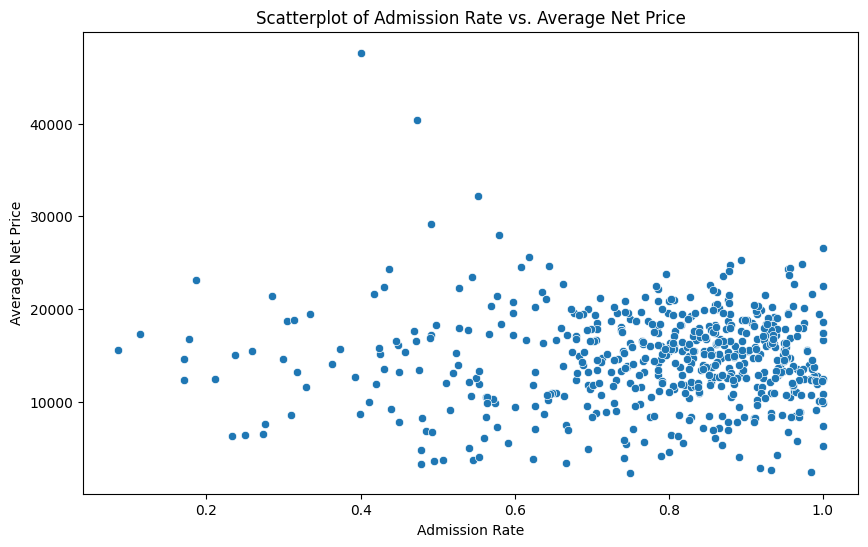

In [ ]:
# prompt: create a scatterplot of ADM_RATE and COST4_A

plt.figure(figsize=(10, 6))
sns.scatterplot(x='ADM_RATE', y='NPT4_PUB', data=df)
plt.xlabel('Admission Rate')
plt.ylabel('Average Net Price')
plt.title('Scatterplot of Admission Rate vs. Average Net Price')
plt.show()

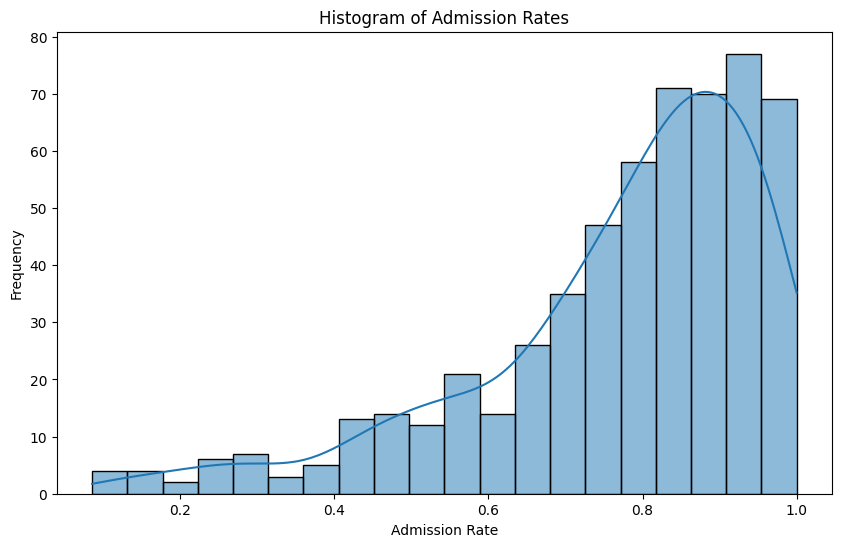

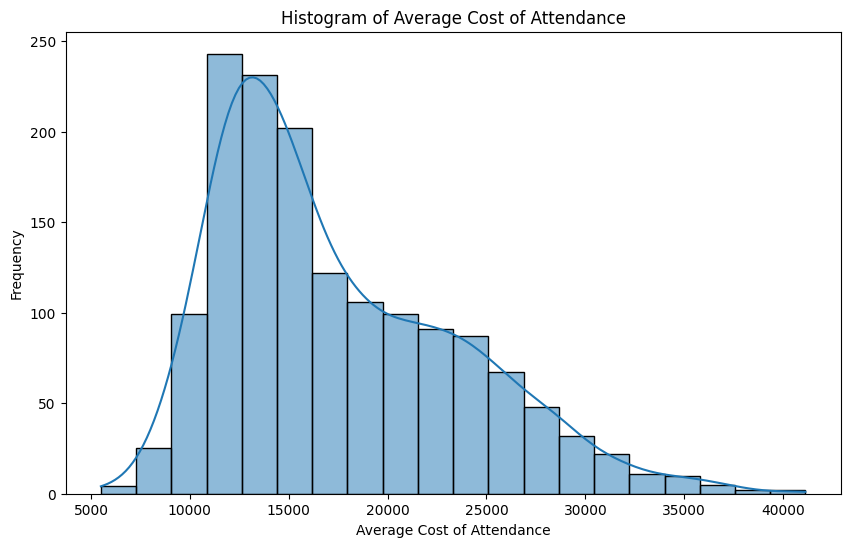

In [ ]:
# prompt: Create a histogram of admissions rates and a histogram of average cost of attendance

plt.figure(figsize=(10, 6))
sns.histplot(df['ADM_RATE'], bins=20, kde=True)
plt.xlabel('Admission Rate')
plt.ylabel('Frequency')
plt.title('Histogram of Admission Rates')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['COSTT4_A'], bins=20, kde=True)
plt.xlabel('Average Cost of Attendance')
plt.ylabel('Frequency')
plt.title('Histogram of Average Cost of Attendance')
plt.show()

In [ ]:
# prompt: merge cost4_A and cost4_P where with one value just take the existing value

# Merge 'COSTT4_A' and 'COSTT4_P' columns, prioritizing 'COSTT4_A'
df['COSTT4_MERGED'] = df['COSTT4_A'].fillna(df['COSTT4_P'])

# Drop the original 'COSTT4_A' and 'COSTT4_P' columns if you no longer need them
df = df.drop(['COSTT4_A', 'COSTT4_P'], axis=1)

df.head()
df23 = df

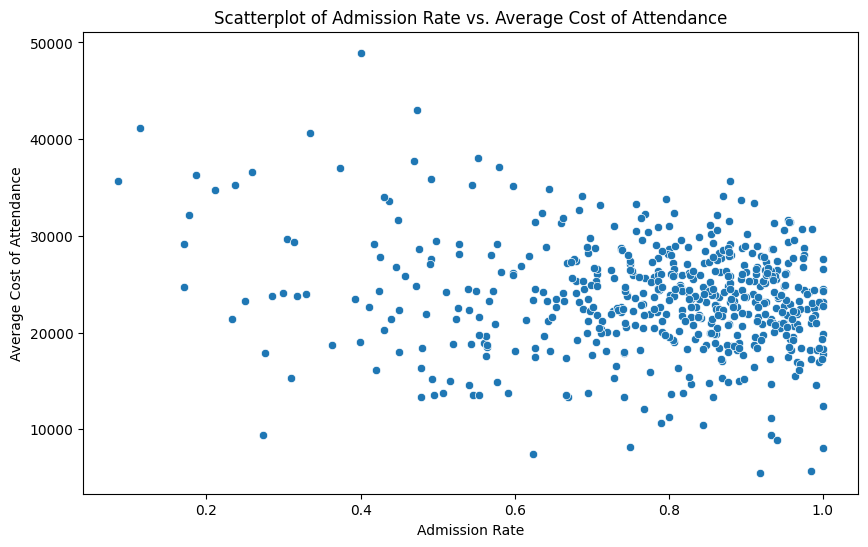

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ADM_RATE', y='COSTT4_MERGED', data=df)
plt.xlabel('Admission Rate')
plt.ylabel('Average Cost of Attendance')
plt.title('Scatterplot of Admission Rate vs. Average Cost of Attendance')
plt.show()

In [ ]:
df23.head()

,UNITID,INSTNM,CONTROL,CITY,STABBR,NUMBRANCH,ADM_RATE,NPT4_PUB,NPT4_PRIV,COSTT4_MERGED
0,100654,Alabama A & M University,1,Normal,AL,1,0.6840,14982.0,NaN,23167.0
1,100663,University of Alabama at Birmingham,1,Birmingham,AL,1,0.8668,16755.0,NaN,26257.0
3,100706,University of Alabama in Huntsville,1,Huntsville,AL,1,0.7810,18240.0,NaN,25777.0
4,100724,Alabama State University,1,Montgomery,AL,1,0.9660,13527.0,NaN,21900.0
5,100751,The University of Alabama,1,Tuscaloosa,AL,1,0.8006,20888.0,NaN,31024.0


Code to clean and process the data sets:

In [ ]:
df22= pd.read_csv('MERGED2021_22_PP.csv')
cols_to_keep = ['UNITID', 'INSTNM', 'CONTROL', 'CITY', 'STABBR', 'NUMBRANCH', 'ADM_RATE', 'NPT4_PUB', 'NPT4_PRIV', 'COSTT4_A', 'COSTT4_P']
df22 = df22[cols_to_keep]
df22 = df22[df22['CONTROL'] == 1]

# Merge 'COSTT4_A' and 'COSTT4_P' columns, prioritizing 'COSTT4_A'
df22['COSTT4_MERGED'] = df22['COSTT4_A'].fillna(df22['COSTT4_P'])

# Drop the original 'COSTT4_A' and 'COSTT4_P' columns if you no longer need them
df22 = df22.drop(['COSTT4_A', 'COSTT4_P'], axis=1)


df22.describe()




<ipython-input-11-f222a12bc225>:1: DtypeWarning: Columns (2037) have mixed types. Specify dtype option on import or set low_memory=False.
  df22= pd.read_csv('MERGED2021_22_PP.csv')


,UNITID,CONTROL,NUMBRANCH,ADM_RATE,NPT4_PUB,NPT4_PRIV,COSTT4_MERGED
count,432.000000,432.0,432.000000,113.000000,421.000000,0.0,421.000000
mean,123204.763889,1.0,1.085648,0.718916,8822.218527,NaN,16330.033254
std,14015.173456,0.0,0.704363,0.223917,4796.516874,NaN,5794.272694
min,100654.000000,1.0,1.000000,0.107700,82.000000,NaN,6079.000000
25%,110562.750000,1.0,1.000000,0.594300,5172.000000,NaN,12103.000000
50%,123488.500000,1.0,1.000000,0.774900,8084.000000,NaN,14826.000000
75%,136368.500000,1.0,1.000000,0.899700,12010.000000,NaN,19681.000000
max,146418.000000,1.0,14.000000,1.000000,25211.000000,NaN,37510.000000


In [ ]:
df21= pd.read_csv('MERGED2020_21_PP.csv')

cols_to_keep = ['UNITID', 'INSTNM', 'CONTROL', 'CITY', 'STABBR', 'NUMBRANCH', 'ADM_RATE', 'NPT4_PUB', 'NPT4_PRIV', 'COSTT4_A', 'COSTT4_P']
df21 = df21[cols_to_keep]
df21 = df21[df21['CONTROL'] == 1]

# Merge 'COSTT4_A' and 'COSTT4_P' columns, prioritizing 'COSTT4_A'
df21['COSTT4_MERGED'] = df21['COSTT4_A'].fillna(df21['COSTT4_P'])

# Drop the original 'COSTT4_A' and 'COSTT4_P' columns if you no longer need them
df21 = df21.drop(['COSTT4_A', 'COSTT4_P'], axis=1)


df21.describe()


,UNITID,CONTROL,NUMBRANCH,ADM_RATE,NPT4_PUB,NPT4_PRIV,COSTT4_MERGED
count,219.000000,219.0,219.000000,56.000000,213.000000,0.0,213.000000
mean,111044.666667,1.0,1.105023,0.709780,9000.643192,NaN,16649.394366
std,6997.631533,0.0,0.915174,0.203255,4697.191963,NaN,6065.107340
min,100654.000000,1.0,1.000000,0.143300,1062.000000,NaN,6012.000000
25%,105476.500000,1.0,1.000000,0.636475,5357.000000,NaN,12245.000000
50%,110574.000000,1.0,1.000000,0.766550,8328.000000,NaN,14989.000000
75%,117459.500000,1.0,1.000000,0.850850,11726.000000,NaN,19361.000000
max,123527.000000,1.0,14.000000,1.000000,24018.000000,NaN,39016.000000


In [ ]:
df20= pd.read_csv('MERGED2019_20_PP.csv')

cols_to_keep = ['UNITID', 'INSTNM', 'CONTROL', 'CITY', 'STABBR', 'NUMBRANCH', 'ADM_RATE', 'NPT4_PUB', 'NPT4_PRIV', 'COSTT4_A', 'COSTT4_P']
df20 = df20[cols_to_keep]
df20 = df20[df20['CONTROL'] == 1]

# Merge 'COSTT4_A' and 'COSTT4_P' columns, prioritizing 'COSTT4_A'
df20['COSTT4_MERGED'] = df20['COSTT4_A'].fillna(df20['COSTT4_P'])

# Drop the original 'COSTT4_A' and 'COSTT4_P' columns if you no longer need them
df20 = df20.drop(['COSTT4_A', 'COSTT4_P'], axis=1)


df20.describe()

,UNITID,CONTROL,NUMBRANCH,ADM_RATE,NPT4_PUB,NPT4_PRIV,COSTT4_MERGED
count,332.000000,332.0,332.000000,85.000000,323.000000,0.0,323.000000
mean,117764.593373,1.0,1.108434,0.654178,8661.634675,NaN,15833.396285
std,11185.946055,0.0,0.761808,0.218704,4859.828109,NaN,5975.968410
min,100654.000000,1.0,1.000000,0.110800,1111.000000,NaN,5940.000000
25%,107632.500000,1.0,1.000000,0.527700,4787.000000,NaN,11534.500000
50%,117698.000000,1.0,1.000000,0.693600,8100.000000,NaN,14301.000000
75%,127578.000000,1.0,1.000000,0.825700,11218.500000,NaN,18638.000000
max,137023.000000,1.0,13.000000,0.990900,26750.000000,NaN,37852.000000


In [ ]:
df20 = df20.rename(columns={col: col + '_20' for col in df20.columns if col not in ['UNITID']})
df21 = df21.rename(columns={col: col + '_21' for col in df21.columns if col not in ['UNITID']})
df22 = df22.rename(columns={col: col + '_22' for col in df22.columns if col not in ['UNITID']})
df23 = df23.rename(columns={col: col + '_23' for col in df23.columns if col not in ['UNITID']})


In [ ]:
df23.head()

,UNITID,INSTNM_23,CONTROL_23,CITY_23,STABBR_23,NUMBRANCH_23,ADM_RATE_23,NPT4_PUB_23,NPT4_PRIV_23,COSTT4_MERGED_23
0,100654,Alabama A & M University,1,Normal,AL,1,0.6840,14982.0,NaN,23167.0
1,100663,University of Alabama at Birmingham,1,Birmingham,AL,1,0.8668,16755.0,NaN,26257.0
3,100706,University of Alabama in Huntsville,1,Huntsville,AL,1,0.7810,18240.0,NaN,25777.0
4,100724,Alabama State University,1,Montgomery,AL,1,0.9660,13527.0,NaN,21900.0
5,100751,The University of Alabama,1,Tuscaloosa,AL,1,0.8006,20888.0,NaN,31024.0


In [ ]:
# prompt: merge df20 df21 df22 and df23 into one data frame on UNITID and rename columns based on the year

# Merge the dataframes
merged_df = df20.merge(df21, on='UNITID', how='outer')
merged_df = merged_df.merge(df22, on='UNITID', how='outer')
merged_df = merged_df.merge(df23, on='UNITID', how='outer')

print(merged_df.head())


   UNITID                            INSTNM_20  CONTROL_20     CITY_20  \
0  100654             Alabama A & M University         1.0      Normal   
1  100663  University of Alabama at Birmingham         1.0  Birmingham   
2  100706  University of Alabama in Huntsville         1.0  Huntsville   
3  100724             Alabama State University         1.0  Montgomery   
4  100751            The University of Alabama         1.0  Tuscaloosa   

  STABBR_20  NUMBRANCH_20  ADM_RATE_20  NPT4_PUB_20  NPT4_PRIV_20  \
0        AL           1.0       0.9175      14990.0           NaN   
1        AL           1.0       0.7366      16953.0           NaN   
2        AL           1.0       0.8257      15860.0           NaN   
3        AL           1.0       0.9690      13650.0           NaN   
4        AL           1.0       0.8268      22597.0           NaN   

   COSTT4_MERGED_20  ... COSTT4_MERGED_22  \
0           23053.0  ...          21924.0   
1           24495.0  ...          26248.0   
2    

In [ ]:
merged_df.describe()

,UNITID,CONTROL_20,NUMBRANCH_20,ADM_RATE_20,NPT4_PUB_20,NPT4_PRIV_20,COSTT4_MERGED_20,CONTROL_21,NUMBRANCH_21,ADM_RATE_21,...,ADM_RATE_22,NPT4_PUB_22,NPT4_PRIV_22,COSTT4_MERGED_22,CONTROL_23,NUMBRANCH_23,ADM_RATE_23,NPT4_PUB_23,NPT4_PRIV_23,COSTT4_MERGED_23
count,1721.000000,332.0,332.000000,85.000000,323.000000,0.0,323.000000,219.0,219.000000,56.000000,...,113.000000,421.000000,0.0,421.000000,1721.0,1721.000000,558.000000,1660.000000,0.0,1660.000000
mean,189093.248112,1.0,1.108434,0.654178,8661.634675,NaN,15833.396285,1.0,1.105023,0.709780,...,0.718916,8822.218527,NaN,16330.033254,1.0,1.465427,0.771803,10187.425301,NaN,17355.986145
std,59869.780979,0.0,0.761808,0.218704,4859.828109,NaN,5975.968410,0.0,0.915174,0.203255,...,0.223917,4796.516874,NaN,5794.272694,0.0,2.407618,0.189125,5408.455066,NaN,6186.676203
min,100654.000000,1.0,1.000000,0.110800,1111.000000,NaN,5940.000000,1.0,1.000000,0.143300,...,0.107700,82.000000,NaN,6079.000000,1.0,1.000000,0.085700,-2993.000000,NaN,5500.000000
25%,146366.000000,1.0,1.000000,0.527700,4787.000000,NaN,11534.500000,1.0,1.000000,0.636475,...,0.594300,5172.000000,NaN,12103.000000,1.0,1.000000,0.693975,6143.750000,NaN,12587.750000
50%,187134.000000,1.0,1.000000,0.693600,8100.000000,NaN,14301.000000,1.0,1.000000,0.766550,...,0.774900,8084.000000,NaN,14826.000000,1.0,1.000000,0.825450,9171.000000,NaN,15606.500000
75%,219480.000000,1.0,1.000000,0.825700,11218.500000,NaN,18638.000000,1.0,1.000000,0.850850,...,0.899700,12010.000000,NaN,19681.000000,1.0,1.000000,0.912250,13572.000000,NaN,21397.500000
max,409120.000000,1.0,13.000000,0.990900,26750.000000,NaN,37852.000000,1.0,14.000000,1.000000,...,1.000000,25211.000000,NaN,37510.000000,1.0,21.000000,1.000000,47627.000000,NaN,48940.000000


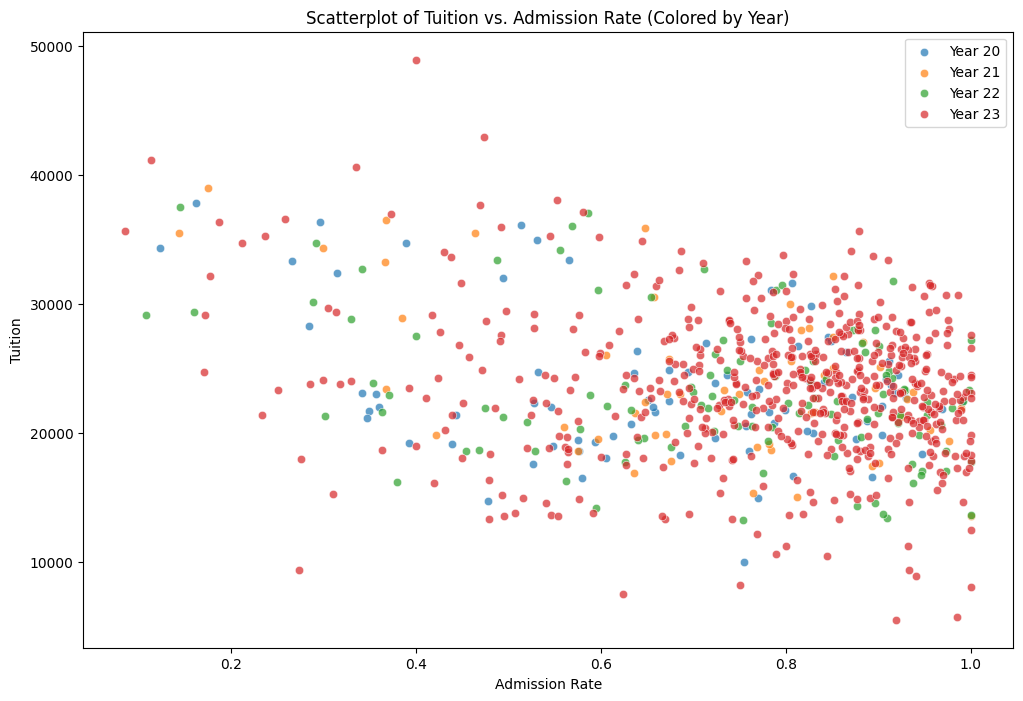

In [ ]:
# prompt: create a scatterplot of tuition and admission rate colored by year where the number at the end of column is the year with very different colors

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'merged_df' is your merged DataFrame

# Create the scatterplot
plt.figure(figsize=(12, 8))

# Iterate through years and plot with different colors
for year in [20, 21, 22, 23]:
    # Construct column names dynamically based on the year
    tuition_col = f'COSTT4_MERGED_{year}'
    admission_col = f'ADM_RATE_{year}'

    sns.scatterplot(x=admission_col, y=tuition_col, data=merged_df, label=f'Year {year}', alpha=0.7)


plt.title('Scatterplot of Tuition vs. Admission Rate (Colored by Year)')
plt.xlabel('Admission Rate')
plt.ylabel('Tuition')
plt.legend()
plt.show()

In [ ]:
# prompt: drop columns where ADM_RATE for any year is blank

# Drop rows where 'ADM_RATE' is blank for any year
for year in [20, 21, 22, 23]:
    admission_rate_col = f'ADM_RATE_{year}'
    merged_df = merged_df.dropna(subset=[admission_rate_col])

print(merged_df.head())
merged_df.describe()

   UNITID                            INSTNM_20  CONTROL_20     CITY_20  \
0  100654             Alabama A & M University         1.0      Normal   
1  100663  University of Alabama at Birmingham         1.0  Birmingham   
2  100706  University of Alabama in Huntsville         1.0  Huntsville   
3  100724             Alabama State University         1.0  Montgomery   
4  100751            The University of Alabama         1.0  Tuscaloosa   

  STABBR_20  NUMBRANCH_20  ADM_RATE_20  NPT4_PUB_20  NPT4_PRIV_20  \
0        AL           1.0       0.9175      14990.0           NaN   
1        AL           1.0       0.7366      16953.0           NaN   
2        AL           1.0       0.8257      15860.0           NaN   
3        AL           1.0       0.9690      13650.0           NaN   
4        AL           1.0       0.8268      22597.0           NaN   

   COSTT4_MERGED_20  ... COSTT4_MERGED_22  \
0           23053.0  ...          21924.0   
1           24495.0  ...          26248.0   
2    

,UNITID,CONTROL_20,NUMBRANCH_20,ADM_RATE_20,NPT4_PUB_20,NPT4_PRIV_20,COSTT4_MERGED_20,CONTROL_21,NUMBRANCH_21,ADM_RATE_21,...,ADM_RATE_22,NPT4_PUB_22,NPT4_PRIV_22,COSTT4_MERGED_22,CONTROL_23,NUMBRANCH_23,ADM_RATE_23,NPT4_PUB_23,NPT4_PRIV_23,COSTT4_MERGED_23
count,55.000000,55.0,55.000000,55.000000,55.000000,0.0,55.000000,55.0,55.000000,55.000000,...,55.000000,55.00000,0.0,55.000000,55.0,55.000000,55.000000,55.000000,0.0,55.000000
mean,107741.963636,1.0,1.309091,0.655358,13264.854545,NaN,23464.909091,1.0,1.327273,0.710502,...,0.722224,12730.40000,NaN,23289.218182,1.0,1.345455,0.712073,13395.200000,NaN,24500.781818
std,5443.226072,0.0,1.665252,0.218602,4375.040497,NaN,6126.289156,0.0,1.795618,0.205056,...,0.225805,4745.34349,NaN,5989.723523,0.0,2.056770,0.246484,4285.138774,NaN,6392.837151
min,100654.000000,1.0,1.000000,0.123200,2768.000000,NaN,9976.000000,1.0,1.000000,0.143300,...,0.107700,2037.00000,NaN,13365.000000,1.0,1.000000,0.085700,4058.000000,NaN,12423.000000
25%,102460.500000,1.0,1.000000,0.529450,11020.000000,NaN,19270.000000,1.0,1.000000,0.636050,...,0.600250,10441.50000,NaN,19272.500000,1.0,1.000000,0.620600,10719.000000,NaN,20330.500000
50%,107983.000000,1.0,1.000000,0.723300,14270.000000,NaN,21967.000000,1.0,1.000000,0.768300,...,0.783500,13384.00000,NaN,22134.000000,1.0,1.000000,0.781000,14006.000000,NaN,23167.000000
75%,110612.500000,1.0,1.000000,0.826250,15352.500000,NaN,26712.500000,1.0,1.000000,0.851000,...,0.900300,15734.50000,NaN,26850.500000,1.0,1.000000,0.917300,16178.500000,NaN,27061.500000
max,122755.000000,1.0,13.000000,0.969000,24104.000000,NaN,37852.000000,1.0,14.000000,1.000000,...,1.000000,23258.00000,NaN,37510.000000,1.0,16.000000,1.000000,24297.000000,NaN,41130.000000


In [ ]:
# prompt: export merged df to csv

# Export the merged DataFrame to a CSV file
merged_df.to_csv('merged_data.csv', index=False)

In [ ]:
new_df = pd.read_csv('merged_data.csv')

In [ ]:
# prompt: Run an ARIMA regression with new df

from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

# Assuming 'new_df' is your DataFrame and you want to forecast 'COSTT4_MERGED_23'
# Replace 'COSTT4_MERGED_23' with the actual column you want to forecast

# Select the relevant column for time series analysis
ts_data = new_df['COSTT4_MERGED_23'].dropna()  # Handle missing values

# Fit the ARIMA model
# (p, d, q) are the model order parameters - you need to determine appropriate values
# based on your data's ACF and PACF plots, or using model selection techniques
model = ARIMA(ts_data, order=(5,1,0)) # Example order, adjust as needed
model_fit = model.fit()

# Make predictions (e.g., for the next 5 time periods)
predictions = model_fit.predict(start=len(ts_data), end=len(ts_data)+4)  # Adjust prediction horizon as needed

# Print the predictions
print(predictions)


# You can also access model diagnostics and other results:
print(model_fit.summary())

55    24464.358901
56    24344.378929
57    24275.516992
58    24276.735681
59    24300.539732
Name: predicted_mean, dtype: float64
                               SARIMAX Results                                
Dep. Variable:       COSTT4_MERGED_23   No. Observations:                   55
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -542.529
Date:                Fri, 25 Oct 2024   AIC                           1097.059
Time:                        12:40:56   BIC                           1108.993
Sample:                             0   HQIC                          1101.661
                                 - 55                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3692      0.118     -3.142      0.002      -0.600      -0.139

In [ ]:
# prompt: for admissions rate

# Assuming 'merged_df' is your merged DataFrame and you want to forecast 'COSTT4_MERGED_23'
# Replace 'COSTT4_MERGED_23' with the actual column you want to forecast

# Select the relevant column for time series analysis
ts_data = new_df['ADM_RATE_23'].dropna()  # Handle missing values

# Fit the ARIMA model
# (p, d, q) are the model order parameters - you need to determine appropriate values
# based on your data's ACF and PACF plots, or using model selection techniques
model = ARIMA(ts_data, order=(5,1,0)) # Example order, adjust as needed
model_fit = model.fit()

# Make predictions (e.g., for the next 5 time periods)
predictions = model_fit.predict(start=len(ts_data), end=len(ts_data)+4)  # Adjust prediction horizon as needed

# Print the predictions
print(predictions)


# You can also access model diagnostics and other results:
print(model_fit.summary())

55    0.763528
56    0.703227
57    0.835387
58    0.722082
59    0.778464
Name: predicted_mean, dtype: float64
                               SARIMAX Results                                
Dep. Variable:            ADM_RATE_23   No. Observations:                   55
Model:                 ARIMA(5, 1, 0)   Log Likelihood                  -0.776
Date:                Fri, 25 Oct 2024   AIC                             13.551
Time:                        12:41:10   BIC                             25.485
Sample:                             0   HQIC                            18.154
                                 - 55                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7009      0.124     -5.655      0.000      -0.944      -0.458
ar.L2         -0.50

In [ ]:
# prompt: regress admissions rate and previous year's tuition on tuition

import statsmodels.api as sm

# Assuming 'new_df' is your DataFrame
# Define the dependent variable (y) and independent variables (X)
y = new_df['COSTT4_MERGED_23']
X = new_df[['ADM_RATE_23', 'COSTT4_MERGED_22']]  # Include admission rate and previous year's tuition

# Add a constant to the independent variables (intercept term)
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       COSTT4_MERGED_23   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     400.3
Date:                Fri, 25 Oct 2024   Prob (F-statistic):           2.60e-32
Time:                        12:41:14   Log-Likelihood:                -482.58
No. Observations:                  55   AIC:                             971.2
Df Residuals:                      52   BIC:                             977.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             6793.9039   1607.987  

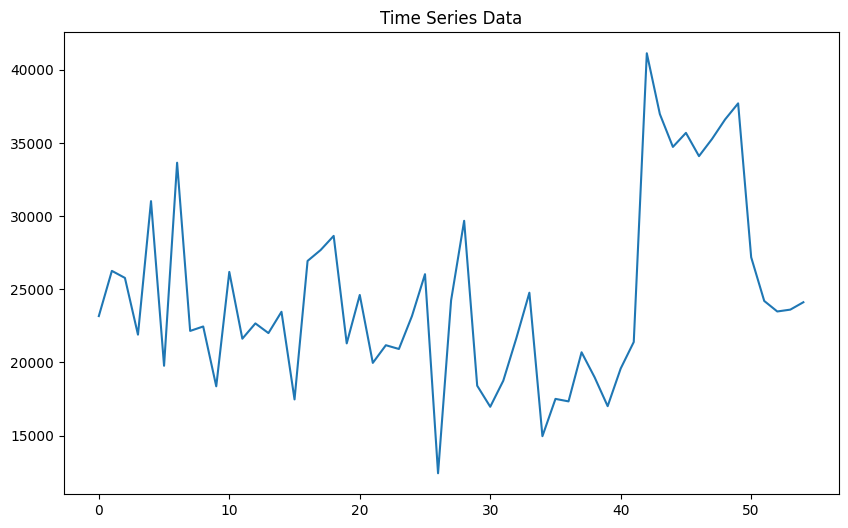

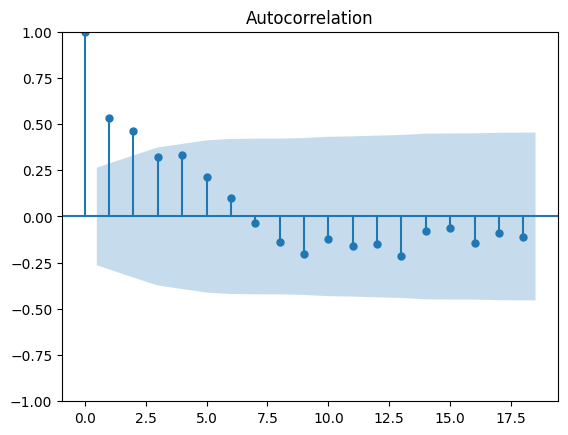

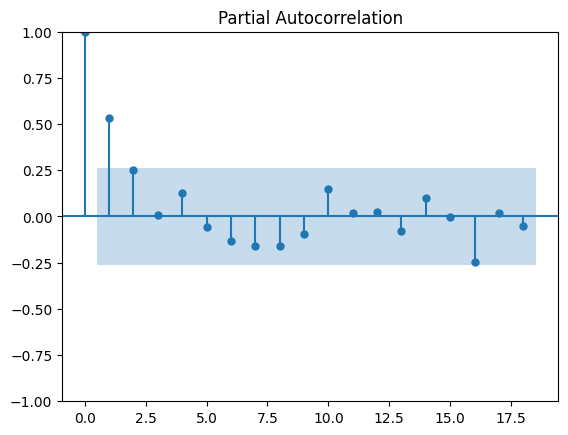

NameError: name 'p' is not defined

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
import numpy as np

# Load your dataset
df = pd.read_csv('merged_data.csv')

# Visualize the time series data
plt.figure(figsize=(10,6))
plt.plot(df['COSTT4_MERGED_23'])
plt.title('Time Series Data')
plt.show()

# Plot ACF and PACF to determine p and q
plot_acf(df['COSTT4_MERGED_23'])
plt.show()

plot_pacf(df['COSTT4_MERGED_23'])
plt.show()

# Fit the ARIMA model (p,d,q) parameters can be adjusted based on ACF and PACF plots
model = ARIMA(df['COSTT4_MERGED_23'], order=(p, d, q))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Make predictions (example: predict the next 10 periods)
forecast = model_fit.forecast(steps=10)
print(forecast)

# Calculate RMSE (if you have a test set)
# Assuming 'test' is your test set for validation
rmse = np.sqrt(mean_squared_error(test['value'], forecast))
print(f'RMSE: {rmse}')
